<a href="https://colab.research.google.com/github/vedanth-aggarwal/food_binary_categorical_classification/blob/main/computer_vision_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

# BINARY CLASSIFICATION

In [ ]:
# Convolutional neural networks
# Computer vision is writing algorthsm to find patterns in visual data

import zipfile

# Food 101
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
#!wget https://storage.googleapis.com/ztm_tf_coursse/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2024-04-25 12:36:54--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.198.207, 173.194.74.207, 209.85.145.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.198.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   123MB/s    in 0.8s    

2024-04-25 12:36:55 (123 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
# Inspect data

!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [ ]:
# Explore directories of dataset
import os

for dirpath,dirnames,filenames in os.walk('pizza_steak'):
  print(f'Directorites {len(dirnames)} / Images {len(filenames)} / in {dirpath}')


Directorites 2 / Images 0 / in pizza_steak
Directorites 2 / Images 0 / in pizza_steak/train
Directorites 0 / Images 750 / in pizza_steak/train/steak
Directorites 0 / Images 750 / in pizza_steak/train/pizza
Directorites 2 / Images 0 / in pizza_steak/test
Directorites 0 / Images 250 / in pizza_steak/test/steak
Directorites 0 / Images 250 / in pizza_steak/test/pizza


In [ ]:
num_steak_image_train = len(os.listdir('pizza_steak/train/steak'))

In [ ]:
import matplotlib.pyplot as plt
import pathlib
import numpy as np

data_dir = pathlib.Path('pizza_steak/train')
# Create a list of class names as subdirectories
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# Function to view random image from dataset

import matplotlib.image as mpimg
import random

def view_rand_img(target_dir,target_class):
  target_folder = target_dir + '/' + target_class
  rand_img = random.sample(os.listdir(target_folder),1)
  img = mpimg.imread(target_folder + "/" + rand_img[0])

  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')
  print(img.shape) # show image shape
  return img

img = view_rand_img('pizza_steak/train','steak')


FileNotFoundError: [Errno 2] No such file or directory: 'pizza_steak/train/steak'

In [ ]:
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[130,  71,  53],
        [132,  74,  54],
        [137,  81,  58],
        ...,
        [ 13,  27,  12],
        [ 14,  28,  13],
        [ 15,  29,  14]],

       [[133,  76,  57],
        [134,  79,  59],
        [139,  85,  61],
        ...,
        [ 15,  29,  14],
        [ 16,  30,  15],
        [ 18,  32,  17]],

       [[134,  83,  64],
        [134,  86,  64],
        [139,  91,  68],
        ...,
        [ 16,  30,  17],
        [ 17,  31,  18],
        [ 19,  33,  20]],

       ...,

       [[214, 234, 235],
        [213, 233, 234],
        [212, 232, 233],
        ...,
        [163, 166, 147],
        [167, 168, 150],
        [173, 174, 156]],

       [[216, 234, 234],
        [215, 233, 233],
        [213, 231, 231],
        ...,
        [163, 166, 147],
        [164, 165, 147],
        [169, 171, 150]],

       [[218, 236, 236],
        [216, 234, 234],
        [214, 232, 232],
        ...,
        [168, 171, 15

In [ ]:
# CNN- Load image, preprocess, find pattern
# USE A GPU
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

train_data = train_datagen.flow_from_directory(train_dir,batch_size=32,target_size=(224,224),
                                               class_mode = 'binary',seed=42)
valid_data = valid_datagen.flow_from_directory(test_dir,batch_size=32,target_size=(224,224),
                                               class_mode = 'binary',seed=42)


# Build a CNN ( Tiny VGG CNN Explainer website)

model1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,
                           activation='relu',input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,padding='valid'),
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,
                           activation='relu'),
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,
                           activation='relu'),
    #tf.keras.layers.Activations(tf.nn.relu)
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model1.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

history1 = model1.fit(train_data,epochs=5,steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data)) # 47 steps 1 for each bacth 1500/32 = 47

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 16s 313ms/step - loss: 0.5691 - accuracy: 0.6893 - val_loss: 0.4238 - val_accuracy: 0.8120
Epoch 2/5
47/47 [==============================] - 14s 307ms/step - loss: 0.4184 - accuracy: 0.8133 - val_loss: 0.3748 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 14s 302ms/step - loss: 0.3929 - accuracy: 0.8320 - val_loss: 0.3259 - val_accuracy: 0.8800
Epoch 4/5
47/47 [==============================] - 14s 306ms/step - loss: 0.3453 - accuracy: 0.8573 - val_loss: 0.3147 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 14s 307ms/step - loss: 0.3327 - accuracy: 0.8673 - val_loss: 0.2864 - val_accuracy: 0.8740


In [ ]:
# Use other model with image
tf.random.set_seed(42)

model2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model2.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

history2 = model2.fit(train_data,epochs=5,steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data)) # 47 steps 1 for each bacth 1500/32 = 47

Epoch 1/5
47/47 [==============================] - 6s 108ms/step - loss: 0.7020 - accuracy: 0.5040 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 5s 103ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 5s 101ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 5s 101ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 101ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
# Use other model with image
# Model 2 has 20x more params than model 1 yet 50% guess
tf.random.set_seed(42)

model3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model3.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

history3 = model3.fit(train_data,epochs=5,steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data)) # 47 steps 1 for each bacth 1500/32 = 47

Epoch 1/5
47/47 [==============================] - 7s 134ms/step - loss: 4.5916 - accuracy: 0.6307 - val_loss: 1.1684 - val_accuracy: 0.7100
Epoch 2/5
47/47 [==============================] - 6s 129ms/step - loss: 1.0731 - accuracy: 0.7213 - val_loss: 1.3328 - val_accuracy: 0.5740
Epoch 3/5
47/47 [==============================] - 6s 129ms/step - loss: 0.7557 - accuracy: 0.7127 - val_loss: 0.6078 - val_accuracy: 0.6920
Epoch 4/5
47/47 [==============================] - 6s 129ms/step - loss: 0.8278 - accuracy: 0.7193 - val_loss: 1.0652 - val_accuracy: 0.6640
Epoch 5/5
47/47 [==============================] - 6s 130ms/step - loss: 0.5907 - accuracy: 0.7633 - val_loss: 1.2689 - val_accuracy: 0.6140


In [ ]:
model3.summary()
# 500x params yet less accuracy

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


(512, 512, 3)
(384, 512, 3)


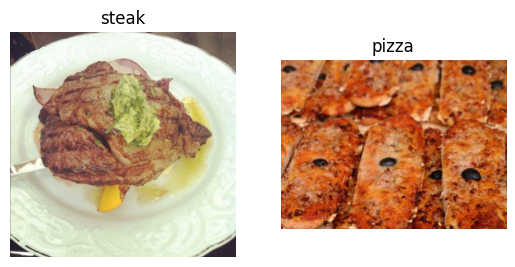

In [ ]:
# CNN EXPLAINER WEBSITE
# Dense layer has more patterns but cnn finds the most important deciding feature
# Better at features in image

plt.figure()
plt.subplot(1,2,1)
steak_img = view_rand_img('pizza_steak/train','steak')
plt.subplot(1,2,2)
pizza_img = view_rand_img('pizza_steak/train','pizza')

In [ ]:
# Preprocess data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Batch is small subset of data - large datasets can't be retained in memory
# !nvidia-smi
# Trying to learn patterns in millions of image is tough split so one batch to another

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255) # divide pizel for normalization
valid_datagen = ImageDataGenerator(rescale=1./255) # convert to tensors

train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

train_data = train_datagen.flow_from_directory(train_dir,batch_size=32,target_size=(224,224),
                                               class_mode = 'binary',seed=42)
valid_data = valid_datagen.flow_from_directory(test_dir,batch_size=32,target_size=(224,224),
                                               class_mode = 'binary',seed=42) # minibatches


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images,labels = train_data.next()
images,labels

(array([[[[0.42352945, 0.43137258, 0.34509805],
          [0.3137255 , 0.32941177, 0.2392157 ],
          [0.26666668, 0.28235295, 0.18431373],
          ...,
          [0.42352945, 0.34509805, 0.3803922 ],
          [0.427451  , 0.34901962, 0.39607847],
          [0.45098042, 0.36862746, 0.427451  ]],
 
         [[0.2901961 , 0.30588236, 0.21568629],
          [0.45882356, 0.47450984, 0.37647063],
          [0.2627451 , 0.28627452, 0.18431373],
          ...,
          [0.39607847, 0.34117648, 0.34117648],
          [0.4156863 , 0.36862746, 0.38431376],
          [0.39607847, 0.34901962, 0.3647059 ]],
 
         [[0.3647059 , 0.40000004, 0.29411766],
          [0.38823533, 0.42352945, 0.31764707],
          [0.30588236, 0.34117648, 0.23529413],
          ...,
          [0.34509805, 0.3254902 , 0.30980393],
          [0.30980393, 0.29803923, 0.2784314 ],
          [0.3372549 , 0.3254902 , 0.30588236]],
 
         ...,
 
         [[0.5137255 , 0.5019608 , 0.54509807],
          [0.52156

In [ ]:
# Baseline is a simple or prexisting model which you try to beat
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

model4 = Sequential([
    Conv2D(filters=10,kernel_size=3,strides=1,padding='valid', # high number adds blank pixel so edges information can be preserved
                           activation='relu',input_shape=(224,224,3)), # same padding mean output and input same shape
    Conv2D(filters=10,kernel_size=3,
                           activation='relu'),
    Conv2D(filters=10,kernel_size=3,
                           activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid') # valid padding keepss reduing shape
])


In [ ]:
model4.compile(loss='binary_crossentropy',
               optimizer=Adam(),
               metrics=['accuracy'])

history4 = model4.fit(train_data, # combination of X and y
                      epochs=5,
                      steps_per_epoch=len(train_data), # 1 step per batch
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

#callbacks=[tensorboard_callback]

Epoch 1/5
47/47 [==============================] - 20s 417ms/step - loss: 0.6175 - accuracy: 0.6860 - val_loss: 0.4351 - val_accuracy: 0.8180
Epoch 2/5
47/47 [==============================] - 19s 413ms/step - loss: 0.4593 - accuracy: 0.7893 - val_loss: 0.3550 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 19s 412ms/step - loss: 0.3273 - accuracy: 0.8687 - val_loss: 0.4219 - val_accuracy: 0.8160
Epoch 4/5
47/47 [==============================] - 19s 410ms/step - loss: 0.1834 - accuracy: 0.9347 - val_loss: 0.3985 - val_accuracy: 0.8360
Epoch 5/5
47/47 [==============================] - 19s 410ms/step - loss: 0.0732 - accuracy: 0.9833 - val_loss: 0.4072 - val_accuracy: 0.8280


<Axes: >

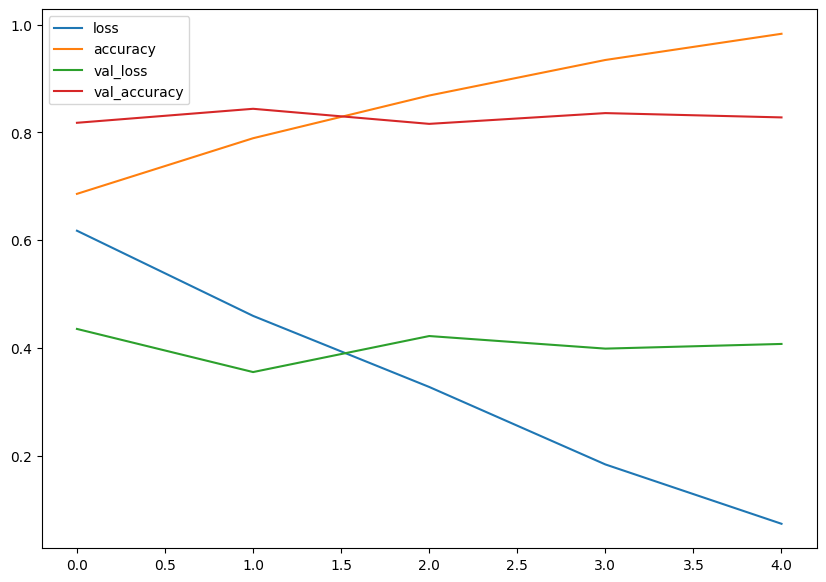

In [ ]:
import pandas as pd
pd.DataFrame(history4.history).plot(figsize=(10,7))

In [ ]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs = range(len(history.history['loss']))

  plt.plot(epochs,loss,label='train loss')
  plt.plot(epochs,val_loss,label='val loss')
  plt.title('loss curve')
  plt.xlabel('epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs,accuracy,label='train acc')
  plt.plot(epochs,val_accuracy,label='val acc')
  plt.title('accuracy curve')
  plt.xlabel('epochs')
  plt.legend()

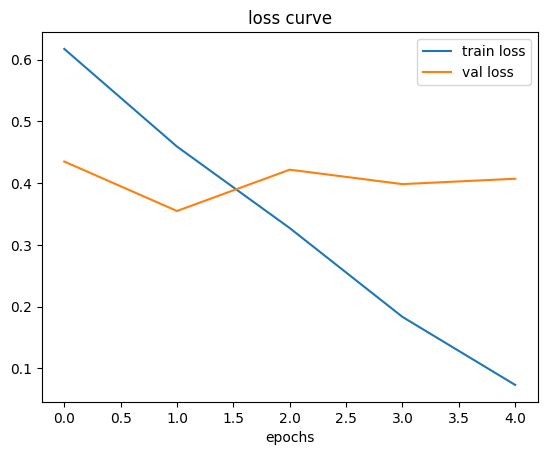

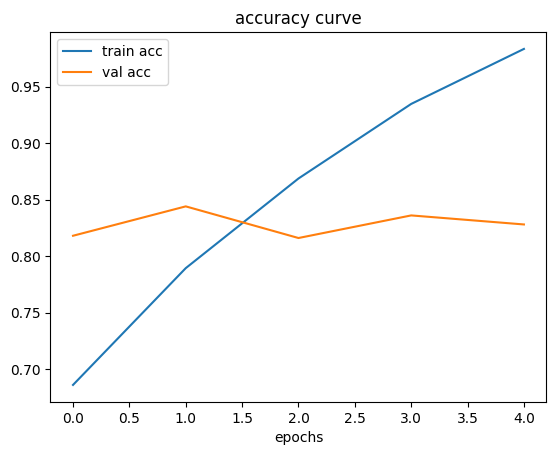

In [ ]:
plot_loss_curves(history4)
# if validation loss starts to icrease it means its overfitting on training
# learning patterns too well can't generalize

In [ ]:
# Steps - Create a baseline, beat baseline by ovefitting a larger model
# Induce overfitting - More conv layers, filters, dense layer to flattened layer

# Reduce - data aug, regularization maxpool, more data

In [ ]:
model5 = Sequential([
    Conv2D(filters=10,kernel_size=3, # high number adds blank pixel so edges information can be preserved
                           activation='relu',input_shape=(224,224,3)), # same padding mean output and input same shape
    MaxPool2D(pool_size=2),
    Conv2D(filters=10,kernel_size=3,
                           activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(filters=10,kernel_size=3,
                           activation='relu'),
    MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid') # valid padding keepss reduing shape
])


In [ ]:
model5.compile(loss='binary_crossentropy',
               optimizer=Adam(),
               metrics=['accuracy'])

history5 = model5.fit(train_data, # combination of X and y
                      epochs=5,
                      steps_per_epoch=len(train_data), # 1 step per batch
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

#callbacks=[tensorboard_callback]
# Paramters get reduced by maxpool

Epoch 1/5
47/47 [==============================] - 7s 139ms/step - loss: 0.5989 - accuracy: 0.6600 - val_loss: 0.4306 - val_accuracy: 0.8280
Epoch 2/5
47/47 [==============================] - 6s 134ms/step - loss: 0.4547 - accuracy: 0.7867 - val_loss: 0.4184 - val_accuracy: 0.8160
Epoch 3/5
47/47 [==============================] - 6s 137ms/step - loss: 0.4174 - accuracy: 0.8140 - val_loss: 0.3446 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 6s 136ms/step - loss: 0.4078 - accuracy: 0.8187 - val_loss: 0.3535 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 6s 133ms/step - loss: 0.3748 - accuracy: 0.8373 - val_loss: 0.3227 - val_accuracy: 0.8700


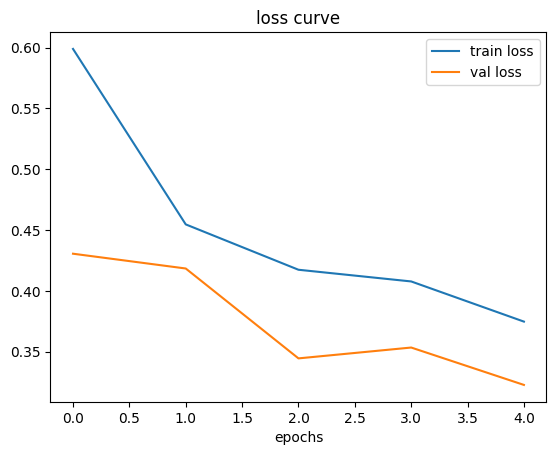

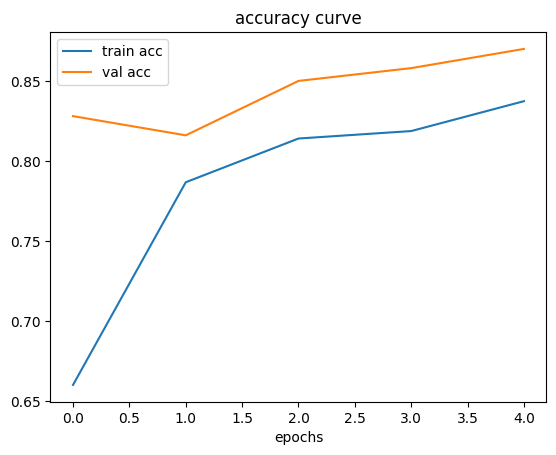

In [ ]:
plot_loss_curves(history5)

In [ ]:
# Reducig overfitting is known as regularization
# Data augmentation

train_datagen_aug = ImageDataGenerator(rescale=1./255,rotation_range=0.2,
                                       shear_range=0.2,zoom_range=0.2,
                                       width_shift_range=0.2,
                                       height_shift_range=0.3,
                                       horizontal_flip=True) # divide pizel for normalization

train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255) # convert to tensors



In [ ]:
print('Augmented data')
train_data_augmented = train_datagen_aug.flow_from_directory(train_dir,
                                                                target_size=(224,224),
                                                                batch_size=32,
                                                                class_mode='binary',
                                                                shuffle=True)

print('Non augmented')
train_data = train_datagen.flow_from_directory(train_dir,
                                                                target_size=(224,224),
                                                                batch_size=32,
                                                                class_mode='binary',
                                                                shuffle=True) # before false
test_data = test_datagen.flow_from_directory(test_dir,
                                                                target_size=(224,224),
                                                                batch_size=32,
                                                                class_mode='binary',
                                                                )

Augmented data
Found 1500 images belonging to 2 classes.
Non augmented
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images, labels = train_data.next()
aug_images,aug_labels = train_data_augmented.next()# labels are same



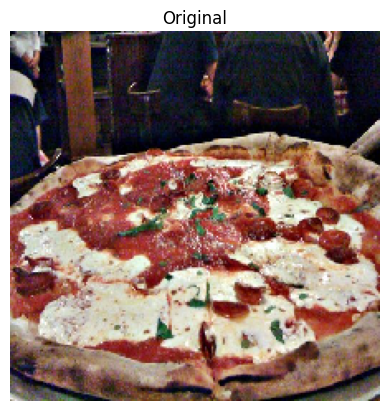

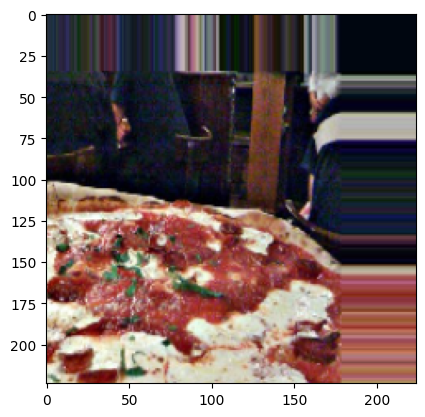

In [ ]:
import random
random_number = random.randint(0,32)

plt.imshow(images[random_number])
plt.title('Original')
plt.axis(False)
plt.figure()
plt.imshow(aug_images[random_number])

In [ ]:
""" Data augmentation alterns data to have more deversity letting it generalize
better, rotate, zoom, shift. This forces it to learn generalizable patterms
ONLY ON TRAINING DATA AND MODIFIED WHEN THEY ARE LOADED NOT DIRECTORY"""

train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

train_data = train_datagen.flow_from_directory(train_dir,batch_size=32,target_size=(224,224),
                                               class_mode = 'binary',seed=42)
valid_data = valid_datagen.flow_from_directory(test_dir,batch_size=32,target_size=(224,224),
                                               class_mode = 'binary',seed=42) # minibatches

In [ ]:
model6 = Sequential([
    Conv2D(filters=10,kernel_size=3, # high number adds blank pixel so edges information can be preserved
                           activation='relu',input_shape=(224,224,3)), # same padding mean output and input same shape
    MaxPool2D(pool_size=2),
    Conv2D(filters=10,kernel_size=3,
                           activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(filters=10,kernel_size=3,
                           activation='relu'),
    MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid') # valid padding keepss reduing shape
])


In [ ]:
model6.compile(loss='binary_crossentropy',
               optimizer=Adam(),
               metrics=['accuracy'])

# augments data on the fly increasing epoch time
history6 = model6.fit(train_data_augmented, # combination of X and y
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented), # 1 step per batch
                      validation_data=test_data,
                      validation_steps=len(test_data))

# without shuffle it learns entire pizza first and not steak
# shuffle it learns both together so no need for change

Epoch 1/5
47/47 [==============================] - 20s 416ms/step - loss: 0.6556 - accuracy: 0.5973 - val_loss: 0.5486 - val_accuracy: 0.7380
Epoch 2/5
47/47 [==============================] - 19s 404ms/step - loss: 0.5807 - accuracy: 0.6907 - val_loss: 0.4541 - val_accuracy: 0.8060
Epoch 3/5
47/47 [==============================] - 19s 409ms/step - loss: 0.5211 - accuracy: 0.7507 - val_loss: 0.3808 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 19s 405ms/step - loss: 0.5025 - accuracy: 0.7520 - val_loss: 0.3758 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 19s 412ms/step - loss: 0.4909 - accuracy: 0.7673 - val_loss: 0.4076 - val_accuracy: 0.8060


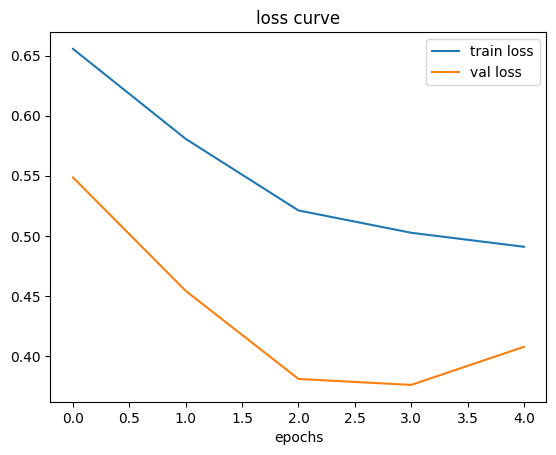

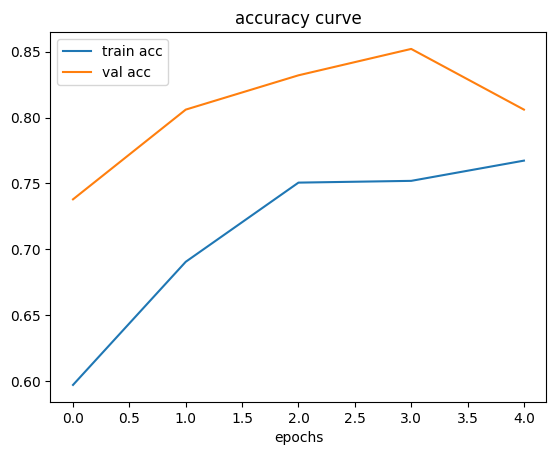

In [ ]:
plot_loss_curves(history6)

In [ ]:
# Add more conv or maxpool layers
# more filters 32 64
# train longer
# find ideal learning rate
# more data
# transfer learning

In [ ]:
import matplotlib.image as mpimg
steak = mpimg.imread('03-steak.jpeg')

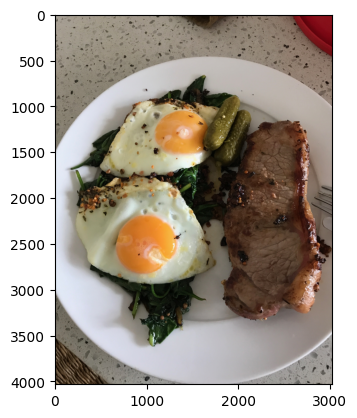

In [ ]:
plt.imshow(steak)

In [ ]:
# Reshape and preprocess

def prep_image(filename,image_shape=224):
  img = tf.io.read_file(filename)
  # Decode
  img = tf.image.decode_image(img)
  img = tf.image.resize(img,size=[image_shape,image_shape])
  # rescale
  img = img/255.0
  return img

img = prep_image('03-steak.jpeg')


In [ ]:
pred = model6.predict(tf.expand_dims(img,axis=0))

1/1 [==============================] - 0s 27ms/step


In [ ]:
#pred_class = class_names [int(tf.round(pred))]

# Plot predictions and image
def pred_plot(model,filename,class_names=class_names):
  img = prep_image(filename)
  pred = model.predict(tf.expand_dims(img,axis=0))
  pred_class = class_names [int(tf.round(pred))]

  plt.imshow(img)
  plt.title(pred_class)
  plt.axis(False)

#pred_plot(model6,'03-steak.jpeg')

NameError: name 'model6' is not defined

#MULTI CLASS CLASSIFICATION

In [ ]:
import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-04-28 12:44:39--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.171.207, 142.251.120.207, 142.251.161.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.171.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  61.4MB/s    in 5.9s    

2024-04-28 12:44:45 (83.5 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 

In [ ]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)



['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


(512, 512, 3)


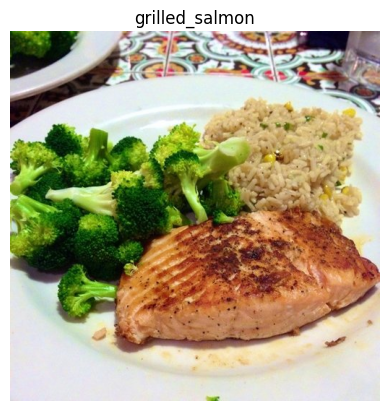

In [ ]:
import random
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

def view_rand_img(target_dir,target_class):
  target_folder = target_dir + '/' + target_class
  rand_img = random.sample(os.listdir(target_folder),1)
  img = mpimg.imread(target_folder + "/" + rand_img[0])

  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')
  print(img.shape) # show image shape
  return img

img = view_rand_img(target_dir=train_dir,
                        target_class=random.choice(class_names)) # get a random class name

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (a clone of model_8, except to be multi-class)
model_9 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_9.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
history_9 = model_9.fit(train_data, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 36s 130ms/step - loss: 2.1837 - accuracy: 0.1927 - val_loss: 2.1895 - val_accuracy: 0.1844
Epoch 2/5
235/235 [==============================] - 30s 126ms/step - loss: 1.9950 - accuracy: 0.2997 - val_loss: 1.9093 - val_accuracy: 0.3292
Epoch 3/5
235/235 [==============================] - 31s 130ms/step - loss: 1.6717 - accuracy: 0.4335 - val_loss: 1.8619 - val_accuracy: 0.3700
Epoch 4/5
235/235 [==============================] - 28s 117ms/step - loss: 1.1007 - accuracy: 0.6396 - val_loss: 2.2301 - val_accuracy: 0.3120
Epoch 5/5
235/235 [==============================] - 37s 156ms/step - loss: 0.4613 - accuracy: 0.8539 - val_loss: 3.1754 - val_accuracy: 0.2736


In [ ]:
model_9.evaluate(test_data)

79/79 [==============================] - 7s 85ms/step - loss: 3.1754 - accuracy: 0.2736


[3.1754307746887207, 0.2736000120639801]

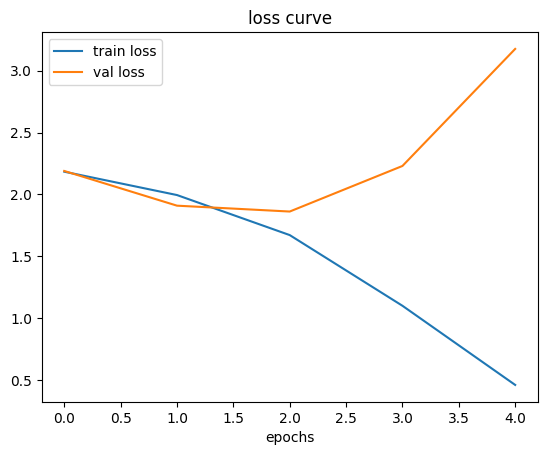

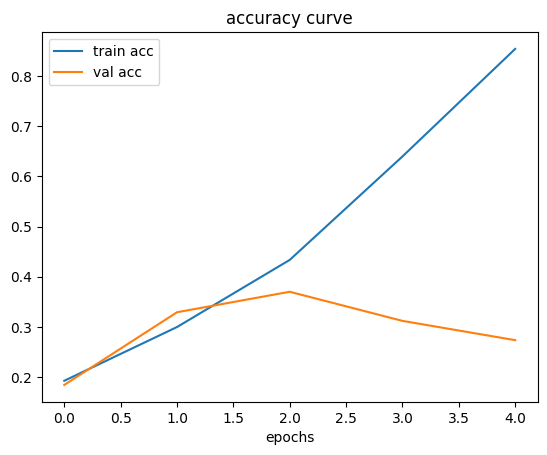

In [ ]:
plot_loss_curves(history_9)

In [ ]:
# Model is overfitting training set but fails to generalize
# CNN EXPLAINER WEBSITE
"""
- Get more data
- Simplify the model ( LESS LAYERS , LESS HIDDEN UNITS )
- DATA AUGMENTATION
- TRANSFER LEARNING
"""

In [ ]:
model10 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  #Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  #Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model10.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history10 = model10.fit(train_data, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 29s 113ms/step - loss: 2.1123 - accuracy: 0.2513 - val_loss: 1.9333 - val_accuracy: 0.3256
Epoch 2/5
235/235 [==============================] - 32s 137ms/step - loss: 1.7580 - accuracy: 0.4053 - val_loss: 1.9389 - val_accuracy: 0.3244
Epoch 3/5
235/235 [==============================] - 33s 141ms/step - loss: 1.3828 - accuracy: 0.5548 - val_loss: 2.0346 - val_accuracy: 0.3020
Epoch 4/5
235/235 [==============================] - 36s 152ms/step - loss: 0.8936 - accuracy: 0.7227 - val_loss: 2.2972 - val_accuracy: 0.3112
Epoch 5/5
235/235 [==============================] - 32s 136ms/step - loss: 0.4866 - accuracy: 0.8667 - val_loss: 2.6536 - val_accuracy: 0.3020


In [ ]:
# Removing 2 conv layers did not affect much paramaters, so similar loss curves
# Conv layers reduce features so might be better instead

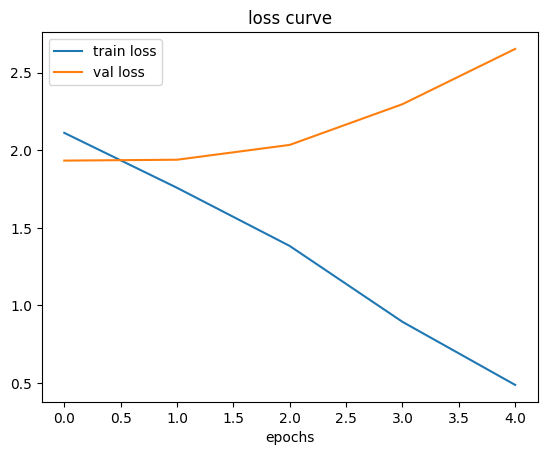

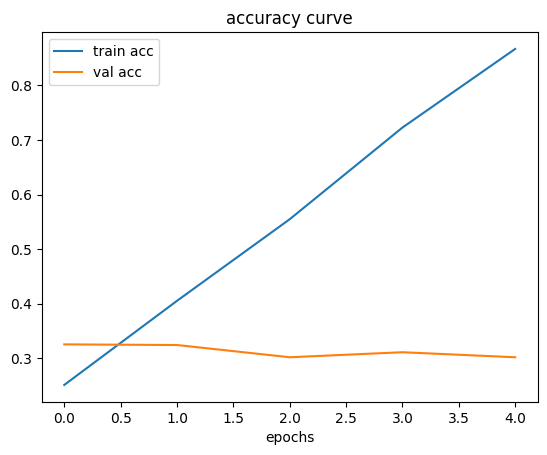

In [ ]:
plot_loss_curves(history10)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   )

#test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data_aug = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

#test_data = train_datagen.flow_from_directory(test_dir,
                                              #target_size=(224, 224),
                                              #batch_size=32,
                                              #class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [ ]:
model11 = tf.keras.models.clone_model(model_9)

model11.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history11 = model11.fit(train_data_aug, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data_aug),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
235/235 [==============================] - 119s 496ms/step - loss: 2.2711 - accuracy: 0.1389 - val_loss: 2.1140 - val_accuracy: 0.2164
Epoch 2/5
235/235 [==============================] - 118s 501ms/step - loss: 2.1202 - accuracy: 0.2497 - val_loss: 1.9458 - val_accuracy: 0.3236
Epoch 3/5
235/235 [==============================] - 114s 484ms/step - loss: 2.0232 - accuracy: 0.2879 - val_loss: 1.8536 - val_accuracy: 0.3672
Epoch 4/5
235/235 [==============================] - 112s 477ms/step - loss: 1.9843 - accuracy: 0.3105 - val_loss: 1.8375 - val_accuracy: 0.3672
Epoch 5/5
235/235 [==============================] - 123s 524ms/step - loss: 1.9535 - accuracy: 0.3232 - val_loss: 1.8221 - val_accuracy: 0.3696


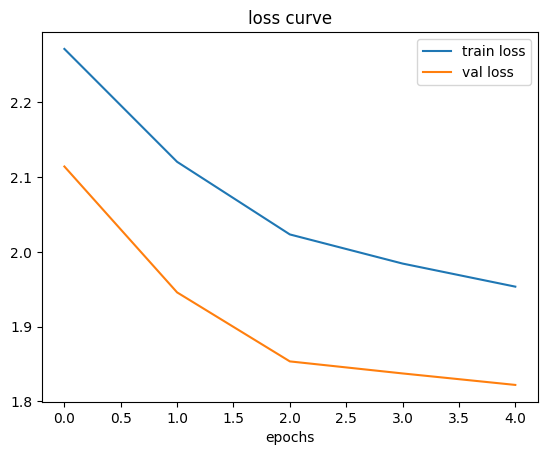

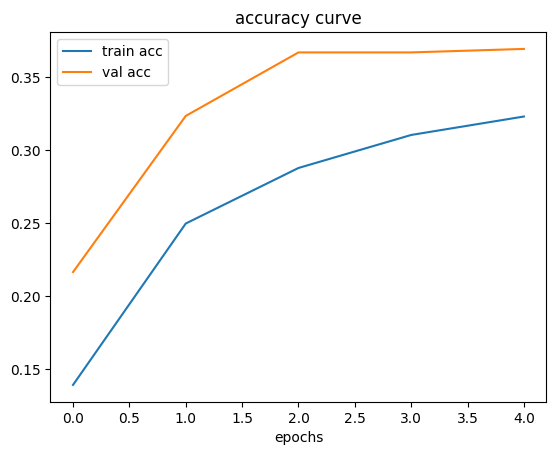

In [ ]:
plot_loss_curves(history11)

In [ ]:
# Experiment
"""
- Model architecture
- Learning rate
- Train longer
- Data aug more
- Trasnfer learning
"""

In [ ]:
# Prediction
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

In [ ]:
def pred_plot(model,filename,class_names=class_names):
  img = prep_image(filename)
  pred = model.predict(tf.expand_dims(img,axis=0))

  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names [int(tf.round(pred[0]))]

  plt.imshow(img)
  plt.title(pred_class)
  plt.axis(False)

1/1 [==============================] - 0s 68ms/step


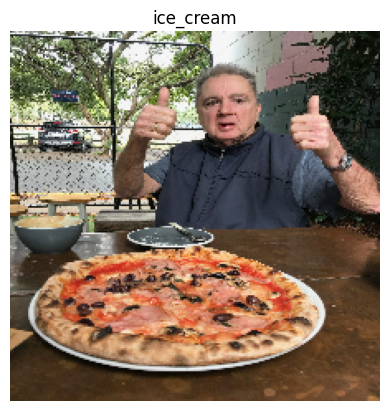

In [ ]:
def prep_image(filename,image_shape=224):
  img = tf.io.read_file(filename)
  # Decode
  img = tf.image.decode_image(img)
  img = tf.image.resize(img,size=[image_shape,image_shape])
  # rescale
  img = img/255.0
  return img


pred_plot(model11,'03-pizza-dad.jpeg',class_names)

In [ ]:
# GOOGLE AI PLATFORM TO HOST MODELS
# Saving and loading models

model11.save('saved_trained_model_11')

In [ ]:
loaded_model11 = tf.keras.models.load_model('saved_trained_model_11')